In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

## Data Set Information:

In [Cortez and Morais, 2007], the output 'area' was first transformed with a ln(x+1) function. 
Then, several Data Mining methods were applied. After fitting the models, the outputs were 
post-processed with the inverse of the ln(x+1) transform. Four different input setups were 
used. The experiments were conducted using a 10-fold (cross-validation) x 30 runs. Two 
regression metrics were measured: MAD and RMSE. A Gaussian support vector machine (SVM) fed 
with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value: 
12.71 +- 0.01 (mean and confidence interval within 95% using a t-student distribution). The 
best RMSE was attained by the naive mean predictor. An analysis to the regression error curve 
(REC) shows that the SVM model predicts more examples within a lower admitted error. In effect, 
the SVM model predicts better small fires, which are the majority.




## Attribute Information:

For more information, read [Cortez and Morais, 2007]. 
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
3. month - month of the year: 'jan' to 'dec' 
4. day - day of the week: 'mon' to 'sun' 
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20 
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10 
9. temp - temperature in Celsius degrees: 2.2 to 33.30 
10. RH - relative humidity in %: 15.0 to 100 
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
(this output variable is very skewed towards 0.0, thus it may make 
sense to model with the logarithm transform).

In [37]:
df = pd.read_csv('forestfires.csv')
df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [38]:
df['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [39]:
mmap = {'aug':8,'sep':9,'mar':3,'jul':7,'feb':9,'jun':6,'oct':15,'apr':5,'dec':12,'may':9,'jan':1,'nov':11}
df['month']=df['month'].map(mmap)

dmap={'sun':7,'fri':5,'sat':6,'mon':1,'tue':2,'thu':4,'wed':3}
df['day']=df['day'].map(dmap)

In [147]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,15,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,15,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


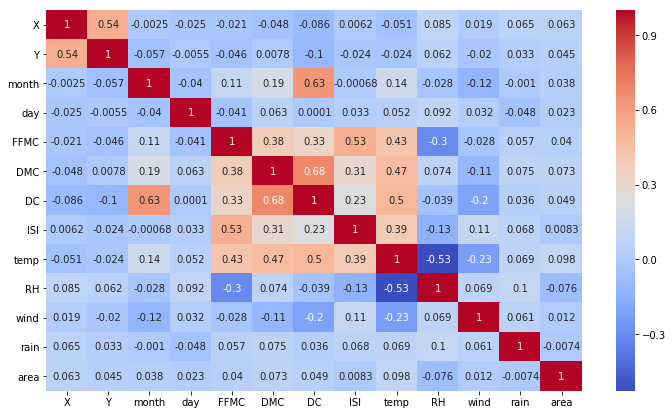

In [56]:
plt.figure(figsize=(12,7
                ))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


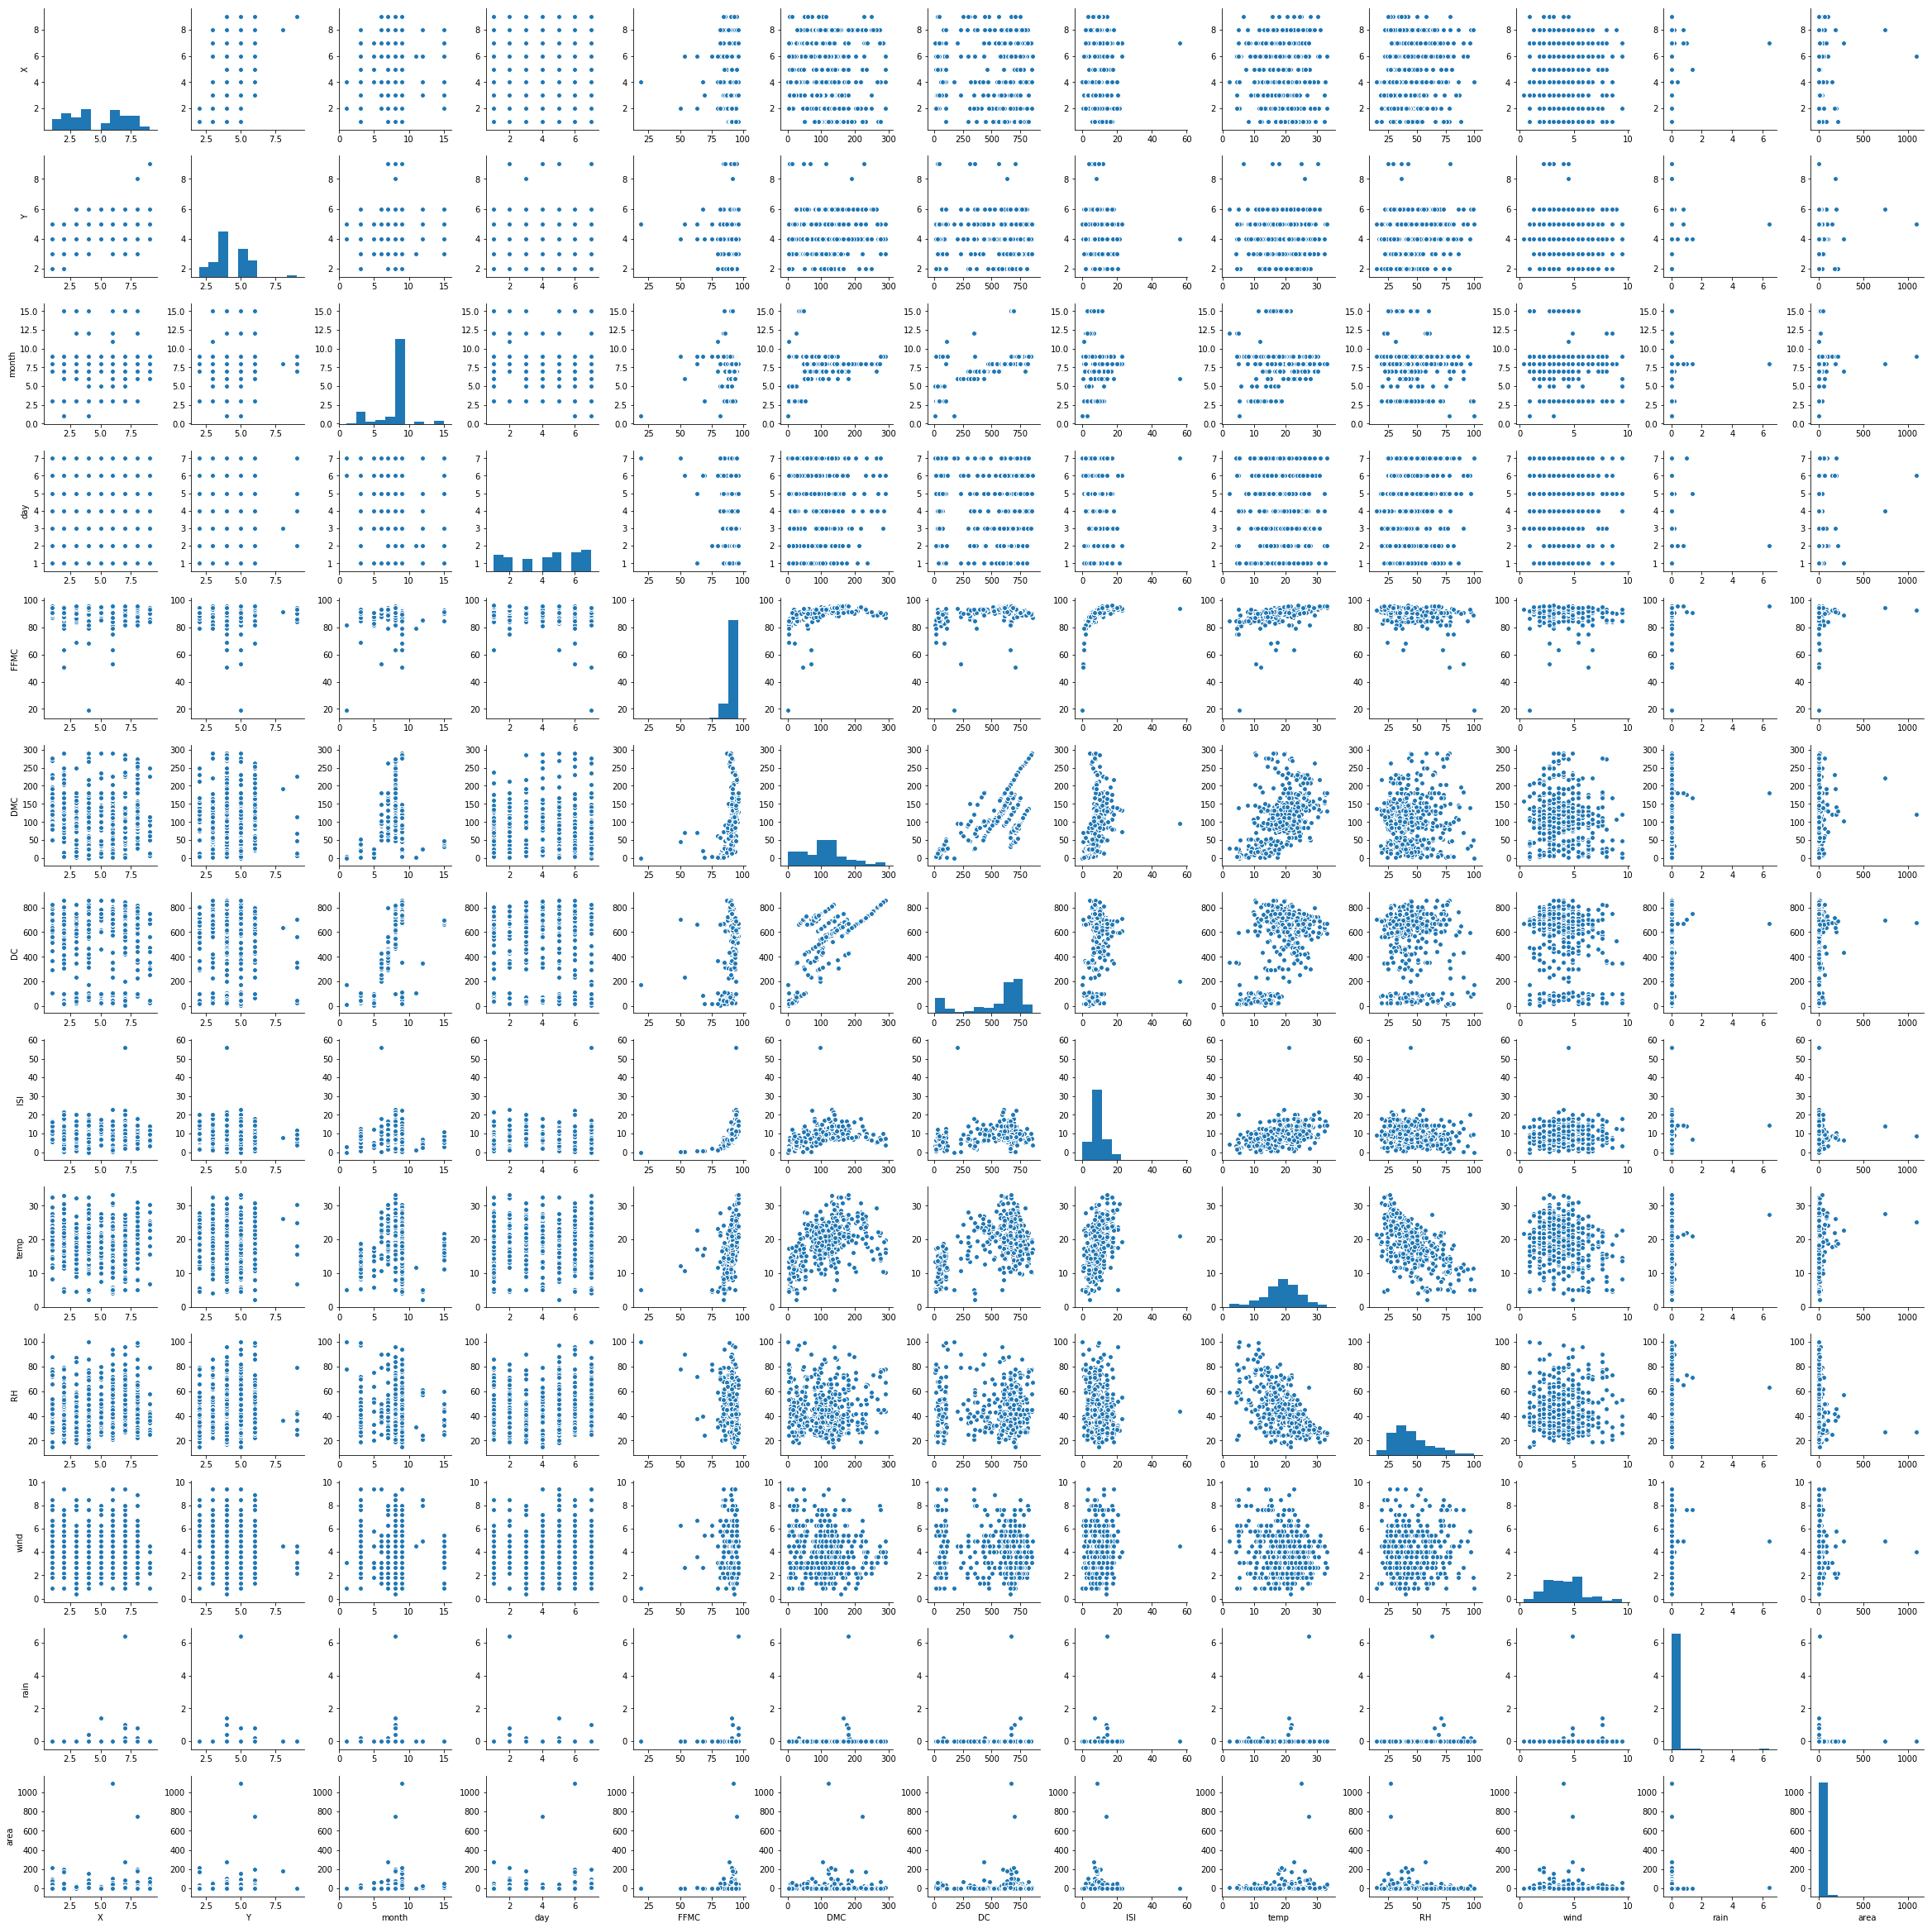

In [66]:
sns.pairplot(df)

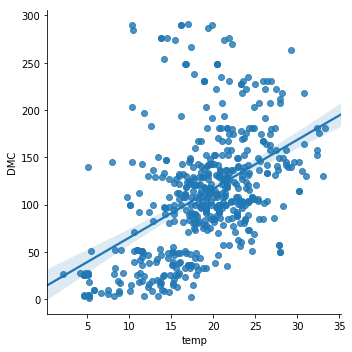

In [143]:
sns.lmplot(x='temp',y='DMC',data=df,)

In [70]:
y=df['DMC']
X=df.drop('DMC', axis=1)

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [133]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [134]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [135]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [  2.45222322e-01   1.98357981e+00  -1.02050878e+01   1.62633772e+00
   2.22016548e+00   2.07488581e-01  -2.98551453e-01   1.94030109e+00
   1.15895188e+00   1.06923914e+00  -1.16362783e+01   7.83268327e-03]


In [136]:
predictions = lm.predict( X_test)

Text(0,0.5,'Predicted Y')

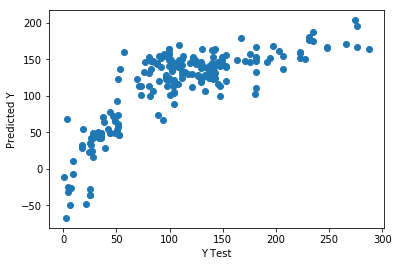

In [137]:

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [138]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 30.8489714561
MSE: 1562.45050145
RMSE: 39.5278446345


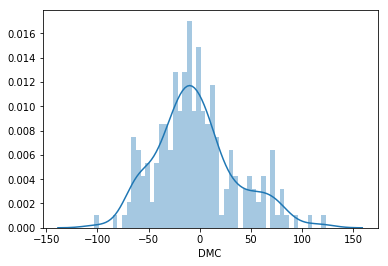

In [139]:
sns.distplot((y_test-predictions),bins=50);

In [140]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
X,0.245222
Y,1.983580
month,-10.205088
day,1.626338
FFMC,2.220165
DC,0.207489
ISI,-0.298551
temp,1.940301
RH,1.158952
wind,1.069239
